# In this example, we look at a nonlinear differential equation, and plot a few solutions based on different initial conditions.

Consider $\frac{dy}{dx}=-\frac{x}{y}$, with $y(1)=y_0$.

Rewriting the equation as $ydy=-xdx$ we get

$\int ydy=\int-xdx$,and the general solution is $x^2+y^2=c$. Sovling $c$ with the initial condition gives

$c = 1 + y_0^2$

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import var, plot_implicit, Eq, symbols, Function, dsolve, Derivative, Rational, simplify,solve
from sympy.plotting import plot

## Pick a few different values of $y_0$ and plot the solutions.

In [ ]:
y0 = 1
c = 1 + y0**2

## We plot the solutions below using the `plot_implicit` function in SymPy.

We first declare the variables x and y by `var('x, y')`, we then plot the function defined implicitly by equation $x^2+y^2=c$ by using `Eq(x**2 + y**2, c)` as input for `plot_implicit`.

Notice, that the plot_implicit function has a couple arguments after `Eq(x**2 + y**2, c)`. The first is `(x, -3.5, 3.5)` which fixes the x-axis on the following interval `[-3.5, 3.5]`. Similarly, `(y, -3.5, 3.5)` fixes the y-axis on the interval `[-3.5, 3.5]`.

We also included the options `show=False` and `aspect_ratio=(1,1)`.

Per the sympy [documentation](https://docs.sympy.org/latest/modules/plotting.html),

**show=TRUE or FALSE** which tells the the sympy library to not show the graph and we can do it manually with `.show()`.

**aspect_ratio=(FLOAT, FLOAT) or {'auto'}** which fixes a ratio on the graph.

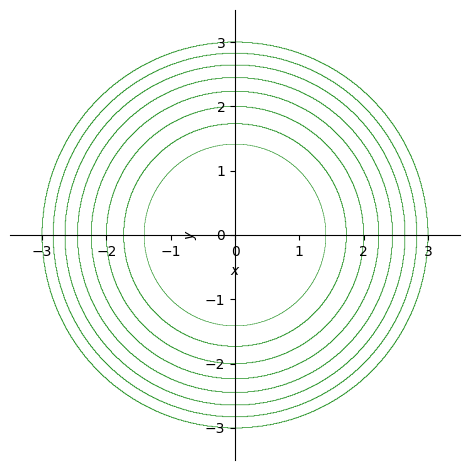

In [ ]:
var('x, y')
# we define the variable general_plot that will be used to display our function x**2 + y**2 = c based on different values of c.
general_plot = plot_implicit(Eq(x**2 + y**2, 2 # c = 2
                                ), (x, -3.5, 3.5), (y, -3.5, 3.5), show=False, aspect_ratio=(1,1), line_color="green")

for c in range(3,10):
    # for every iteration we are appending a graph created with plot_implicit to general_plot
    general_plot.append(plot_implicit(Eq(x**2 + y**2, c), show=False, line_color="green")[0])
# general_plot.show() will plot all the graphs in one figure.
general_plot.show()
# two things to fix/imporve: plot all images in one figure; change the ratio of picture DONE

### Exercise:
Solve the differential equation $(e^{2y}-y)\cos(x)\frac{dy}{dx}=e^y\sin(2x)$, with $y(0)=0$, then plot the solution using code similar to the above cell.

Hint: exponential functions in SymPy is `sym.exp()`; cosine function in SymPy is `sym.cos()`.

## `SymPy` also has a function for solving differential equations. We explore the function `sym.olvers.ode.dsolve` here.

### Example
Here we solve the differential equation

$y''+2y'+y=0$, where $y$ is a function of $t$. We define the derivatives by using `diff`, and solve the differential equation by using `dsolve`, for `y`.

In [ ]:
t = symbols('t')
y = Function('y')(t)

yp = y.diff(t)
ypp = yp.diff(t)
eq = ypp + 2*yp + y

print(eq)
dsolve(eq,y)

y(t) + 2*Derivative(y(t), t) + Derivative(y(t), (t, 2))


Eq(y(t), (C1 + C2*t)*exp(-t))

### Exercise

Run the code that uses the above symbolic method to solve the following equation

$\frac{dy}{dx}=xy^2-\frac{y}{x}-\frac{20}{x^3}$

In [ ]:
x = symbols('x')
y = Function('y')(x)
yp = y.diff(x)
eq = Eq(yp,x*y**2 - (y/x) - (20/x**3))
eq
dsolve(eq)

### Exercise
Write your own first order equation and solve using above methods.

# Population Models: Logistic Model
## Graphing Solution Curves
# We can graph solutions curves for the logistic equation:
$\frac{dP}{dt}=0.06P-0.0004P^2$

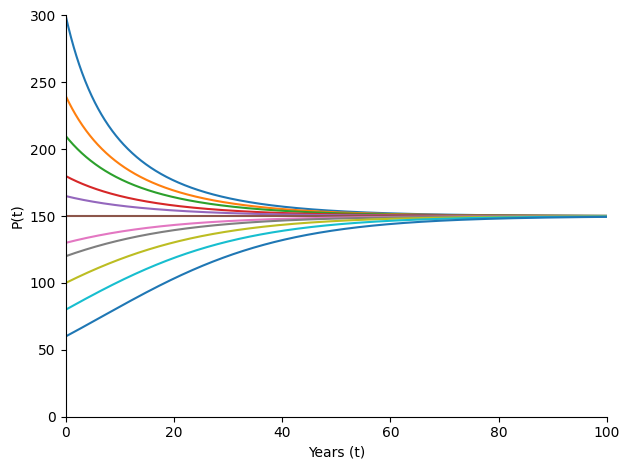

In [ ]:
t = symbols('t') # time in years
P_0 = symbols('P_0') # initial population
P = Function('P')(t) # function
C = [300, 240, 210, 180, 165, 150, 130, 120, 100, 80, 60] # P_0 = C
diff_equation = 150*P_0 / (P_0 + (150 - P_0) * sym.exp(-0.06*t))
diff_equation
init_condition = Eq(diff_equation.subs(t, 0), 150)
P_0_value = solve(init_condition, P_0)[0]
P_0_value
plot_general = plot(diff_equation.subs(P_0, C[0]), (t, 0, 100), xlim=[0, 100], ylim=[0,300], ylabel='P(t)', xlabel='Years (t)',show=False, axis_center=(0,0))
for i in range(1, len(C)):
  plot_general.append(plot(diff_equation.subs(P_0, C[i]), (t, 0, 100), show=False)[0])
plot_general.show()

### Note that not all equations can be solved using the symbolic method. An example is the Riccati equation

$dy/dt = t^2+y^2$

Test with the symbolic method, and you will see an error.